In [1]:
from keras.datasets import cifar10
import keras
import keras.utils
(trainX, trainY), (testX, testY) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 424s 2us/step


In [2]:
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)
def normalize(X):
    return X/255
trainX = normalize(trainX)
testX = normalize(testX)



In [3]:

from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Activation, Dropout

model = keras.Sequential()
model.add(Convolution2D(32, (3,3), activation = 'relu', input_shape = (32,32,3) ) )

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation ('softmax'))




In [25]:
OPT = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)
model.compile(loss = 'categorical_crossentropy', optimizer = OPT, metrics = ['accuracy'])

epoch = model.fit(trainX, trainY, epochs = 250, validation_data = (testX,testY))
model.evaluate(testX,testY)

Epoch 1/250
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1177 - accuracy: 0.2013 - val_loss: 1.8734 - val_accuracy: 0.3293
Epoch 2/250
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8353 - accuracy: 0.3097 - val_loss: 1.6640 - val_accuracy: 0.4056
Epoch 3/250
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6740 - accuracy: 0.3776 - val_loss: 1.5464 - val_accuracy: 0.4429
Epoch 4/250
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5789 - accuracy: 0.4147 - val_loss: 1.4522 - val_accuracy: 0.4905
Epoch 5/250
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5005 - accuracy: 0.4479 - val_loss: 1.3597 - val_accuracy: 0.5163
Epoch 6/250
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4411 - accuracy: 0.4734 - val_loss: 1.3361 - val_accuracy: 0.5292
Epoch 7/250
1563/1563 [==============================] - 5s 4ms/step - loss: 1.3903 - accuracy: 0.4962 - val_loss: 1.2708 - val_ac

[0.6326899528503418, 0.7907000184059143]

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

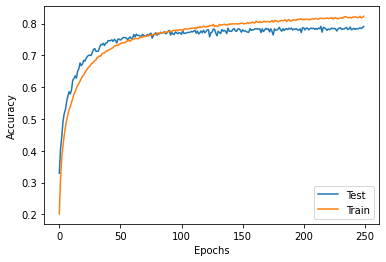

In [26]:
import matplotlib.pyplot as plt

plt.plot(epoch.history['val_accuracy'])
plt.plot(epoch.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Test','Train'])


In [30]:
import pandas as pd
Accuracies = pd.DataFrame()
Accuracies['Validation'] = epoch.history['val_accuracy']
Accuracies['Training'] = epoch.history['accuracy']
writer = pd.ExcelWriter('Accuracies_cifar_10.xlsx')
Accuracies.to_excel(writer)
from google.colab import files
files.download('Accuracies_cifar_10.xlsx')

FileNotFoundError: ignored

In [31]:
Accuracies
from google.colab import files

Accuracies.to_csv('Accuracies_cifar.csv')
files.download('Accuracies_cifar.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>